In [1]:
#importando as bibliotecas necessárias para o experimento:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import callbacks

C:\Users\bruno\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import redesneuraiscin.utils as utils

In [3]:
#X e Y para cada treino, validação e teste:
X_train, Y_train, X_val, Y_val, X_test, Y_test = utils.datasets_split()

input_dim:  243
Train on 261647 samples, validate on 130822 samples
Epoch 1/100000
261647/261647 [==============================] - 11s 42us/step - loss: 0.2291 - acc: 0.6211 - val_loss: 0.2252 - val_acc: 0.6312
Epoch 2/100000
261647/261647 [==============================] - 10s 38us/step - loss: 0.2241 - acc: 0.6354 - val_loss: 0.2230 - val_acc: 0.6392
Epoch 3/100000
261647/261647 [==============================] - 10s 37us/step - loss: 0.2220 - acc: 0.6405 - val_loss: 0.2215 - val_acc: 0.6410
Epoch 4/100000
261647/261647 [==============================] - 10s 37us/step - loss: 0.2210 - acc: 0.6426 - val_loss: 0.2226 - val_acc: 0.6387
Epoch 5/100000
261647/261647 [==============================] - 10s 37us/step - loss: 0.2202 - acc: 0.6439 - val_loss: 0.2212 - val_acc: 0.6411
Epoch 6/100000
261647/261647 [==============================] - 10s 38us/step - loss: 0.2196 - acc: 0.6454 - val_loss: 0.2212 - val_acc: 0.6415
Epoch 7/100000
261647/261647 [==============================] - 10s 

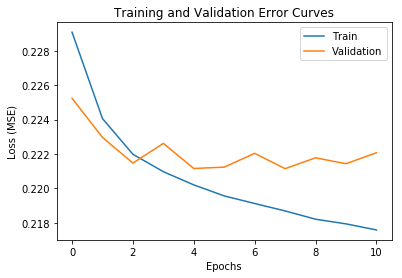

In [5]:
#Criando o modelo a ser treinado, executando-o e verificando as métricas:
input_dim = X_train.shape[1]
print("input_dim: ", input_dim)

mlp = models.Sequential()


mlp.add(layers.Dense(16, activation='tanh', input_dim=input_dim))
mlp.add(layers.Dense(1, activation='sigmoid'))
mlp.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
history = mlp.fit(X_train, Y_train, batch_size=64, epochs=100000,
                         callbacks=[callbacks.EarlyStopping(patience=3)], validation_data=(X_val, Y_val))

utils.plot_training_error_curves(history)

y_pred_scores = mlp.predict(X_test)
y_pred_class = mlp.predict_classes(X_test, verbose=0)
y_pred_scores_0 = 1 - y_pred_scores
y_pred_scores = np.concatenate([y_pred_scores_0, y_pred_scores], axis=1)

Matriz de confusão no conjunto de teste:
[[33156 30619]
 [16510 50540]]

Train Loss:       0.2187
Validation Loss:  0.2211

Performance no conjunto de teste:


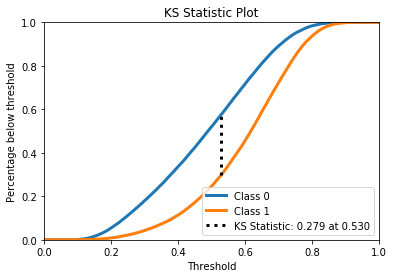


Accuracy:         0.6398
Recall:           0.7538
Precision:        0.6227
F1:               0.6820
AUROC:            0.6915
AUPR:             0.6800


In [6]:
#Avaliando o modelo:
utils.results_summary(history, Y_test, y_pred_class, y_pred_scores)